In [3]:
#import the libraries
import pandas as pd
import seaborn as sns

In [4]:
#load the dataset
df=pd.read_csv(r'C:\Users\Abel\Downloads\glass.csv')

In [5]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [6]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [7]:
#statistic info of the data
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [8]:
df.shape

(214, 10)

<AxesSubplot:>

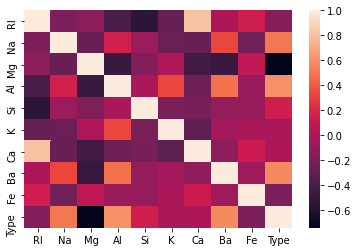

In [9]:
sns.heatmap(df.corr())

<AxesSubplot:>

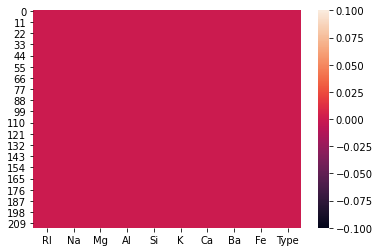

In [10]:
sns.heatmap(df.isnull())

<AxesSubplot:xlabel='Type', ylabel='count'>

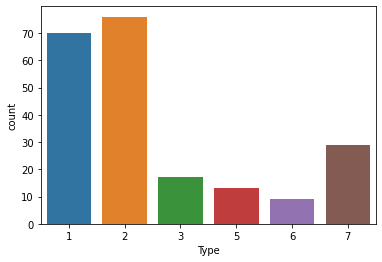

In [11]:
sns.countplot(x=df.Type)

In [26]:
#feature selection using univariate feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [72]:
#seperating the input and output variable
x=df.iloc[:,0:9].values
y=df.iloc[:,-1].values

In [40]:
#implementing the UFS
fs=SelectKBest(score_func=chi2 , k='all')
fs.fit(x,y)
fs.scores_ #scores of each column

array([4.81752628e-05, 4.31125331e+00, 1.00984212e+02, 1.69774883e+01,
       1.10449039e-01, 3.16706320e+01, 3.21092861e+00, 1.45514077e+02,
       2.17018493e+00])

In [68]:
#but we will be using all the features to build the model 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

## Grid Search cv for best k

In [64]:
#importing gridsearch
from sklearn.model_selection import GridSearchCV
param_grid={'n_neighbors':range(2,40)}

In [65]:
gs=GridSearchCV(KNeighborsClassifier(),param_grid)
gs.fit(x,y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(2, 40)})

In [66]:
#best values of the parameters
print(gs.best_score_)
print(gs.best_params_)


0.6311184939091916
{'n_neighbors': 2}


In [73]:
#cross validating data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=30)

In [76]:
#building the model
clf=KNeighborsClassifier(n_neighbors=2)
model=clf.fit(x_train,y_train)

In [78]:
#predicting the model
y_pred=model.predict(x_test)

In [89]:
#accuracy
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.64      0.76      0.70        21
           2       0.76      0.67      0.71        24
           3       0.60      0.75      0.67         4
           5       0.60      0.75      0.67         4
           6       0.00      0.00      0.00         3
           7       0.78      0.78      0.78         9

    accuracy                           0.69        65
   macro avg       0.56      0.62      0.59        65
weighted avg       0.67      0.69      0.68        65

